In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Loading data using keras method

Split is 80/20 
80 percent training
20 percent validating

In [2]:
training_dataset = tf.keras.utils.image_dataset_from_directory(
    './model_data/',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(100,100),
    batch_size=32
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    './model_data/',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(100,100),
    batch_size=32
)

Found 1600 files belonging to 2 classes.
Using 1280 files for training.
Found 1600 files belonging to 2 classes.
Using 320 files for validation.


# Get class names

Should be two: wet and dry

In [3]:
categories = training_dataset.class_names

# Pre-process data

Normalizing rgb values by adding a rescaling layer

In [4]:
norm_layer = layers.Rescaling(1./255)

# Optimize performance

Pre-fetching for fast training and validation

In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = training_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# Build CNN Model

2 2D Convolutional NN 

2 2D MaxPooling NN

2 classes

In [6]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [7]:
fitting = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5
40/40 [==============================] - 4s 80ms/step - loss: 0.6140 - accuracy: 0.6852 - val_loss: 0.6066 - val_accuracy: 0.7063
Epoch 2/5
40/40 [==============================] - 2s 56ms/step - loss: 0.2996 - accuracy: 0.8797 - val_loss: 0.3011 - val_accuracy: 0.8781
Epoch 3/5
40/40 [==============================] - 2s 56ms/step - loss: 0.1781 - accuracy: 0.9430 - val_loss: 0.3410 - val_accuracy: 0.8938
Epoch 4/5
40/40 [==============================] - 2s 56ms/step - loss: 0.1513 - accuracy: 0.9453 - val_loss: 0.2703 - val_accuracy: 0.9156
Epoch 5/5
40/40 [==============================] - 2s 56ms/step - loss: 0.0955 - accuracy: 0.9719 - val_loss: 0.2201 - val_accuracy: 0.9406


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16928)             0

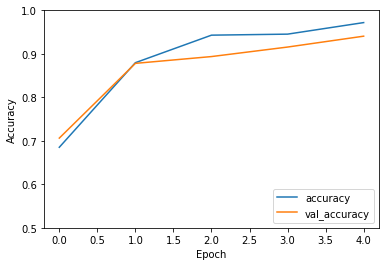

In [9]:
plt.plot(fitting.history['accuracy'], label='accuracy')
plt.plot(fitting.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [10]:
model.save('./models/version1/')

INFO:tensorflow:Assets written to: ./models/version1/assets


INFO:tensorflow:Assets written to: ./models/version1/assets


In [21]:
image_path = './dataset/test/IMG_9983.jpg'
image = tf.keras.preprocessing.image.load_img(image_path)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

1/1 [==============================] - 0s 14ms/step


In [22]:
key = predictions.argmax()
print(f'{image_path} has been classified as a {categories[key]} floor')

./dataset/test/IMG_9983.jpg has been classified as a dry floor
